In [ ]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from skelarn.linear_model import LinearRegression, Lasso, Ridge

In [4]:
np.random.seed(42)

# Gradient descent
Looking the function from two variable: 
$f(x, y) = \sin^2 x + \sin^2 y$

In [8]:
def f(x: np.array(np.float)) -> np.float:
    """
    :param x: np.array(np.float) vector length 2
    :return: np.float
    """
    return np.sum(np.sin(x)**2)

/tmp/ipykernel_3772/1811337109.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def f(x: np.array(np.float)) -> np.float:


1.5348952287053772

In [34]:
from types import FunctionType


def grad_f(x: np.array) -> np.array:
    """
    Gradient function f
    """
    return np.array(2*np.sin(x)*np.cos(x))

assert np.allclose(grad_f(np.array([1, 2])),
                   np.array([0.90929743, -0.7568025])), 'Error'

def grad_descent_2d(f: FunctionType, grad_f: FunctionType, lr: int, num_iter=100, x0=None) -> np.array:
    """
    Realization gradient descent in min for function f from two variables.
        :param f: scalar function from two variables
        :param grad_f: function that returns the gradient function f
        :param lr: learning rate of algorithm
        :param num_iter: number of gradient descent iterations
        :return: np.array[num_iter, 2] like (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2) # Start points
        
    # We will save arguments values and functions values
    # in process gradient descent in history variable
    history = [] 
    
    # cicle iteration -- step of gradient descent
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        
        curr_x -= lr*(grad_f(curr_x))
    
    return np.vstack(history)

In [36]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

/tmp/ipykernel_3772/1058005601.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


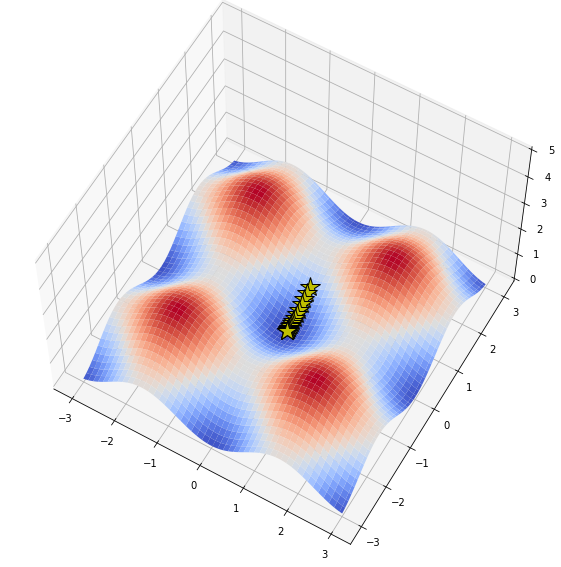

In [38]:
# %matplotlib osx

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='*', markersize=20, zorder=3, 
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

[0.5837969657425405, 0.48424404089343875, 0.38461647246095143, 0.29236854492580683, 0.21333135563965777, 0.15026812609317128, 0.10290012299924521, 0.06898091861319455, 0.04554239237169947, 0.029752122397007606, 0.019298726512191205, 0.012459241347444524, 0.008018889398379648, 0.005150702479133331, 0.003304124491556424, 0.0021177967818733824, 0.001356686641973825, 0.0008688115139898375, 0.0005562575474740729, 0.0003560942607497582]


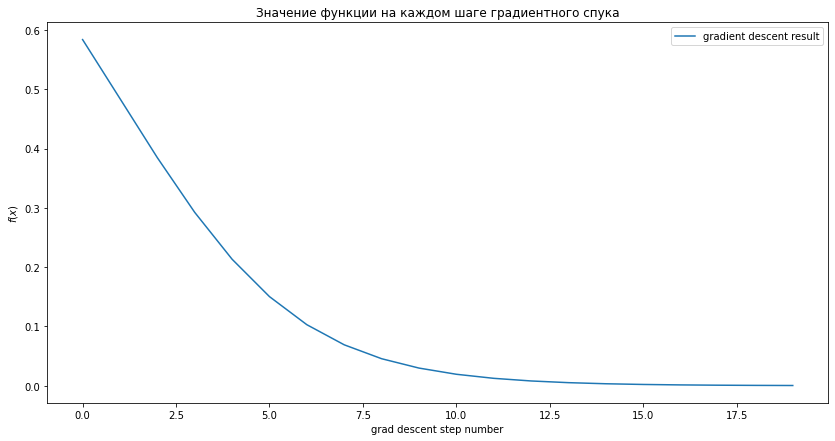

In [44]:
plt.figure(figsize=(14, 7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге градиентного спука')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

In [98]:
def generate_batches(X: np.array, y: np.array, batch_size: int) -> tuple:
    """
    param X: np.array[n_object, n_features] -- матрица объекты-признаки
    param y: np.array[n_object] -- вектор целевых переменных
    """
    assert len(X) == len(y), 'X_train должен = y_train'
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
    
    for batch_start in range(0, len(X), batch_size):
        X = [X[num] for num in perm]
        y = [y[num] for num in perm]
        yield X[batch_start:batch_start+batch_size], y[batch_start:batch_start+batch_size]
    
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

X_rec, y_rec = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_rec.append(X_batch)
    y_rec.append(y_batch)
    
X_rec = np.concatenate(X_rec)
y_rec = np.concatenate(y_rec)

(X_fake != X_rec).all()
            

In [54]:
perm = np.random.permutation(42)
np.random.choice(perm)

11